In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
def SSH_hamiltonian_periodic(N, Delta):
    x = np.zeros(N-1)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    A[0][N-1] = 1 + Delta
    A[N-1][0] = 1 + Delta
    return A

In [3]:
SSH_hamiltonian_periodic(4, 0.5)

array([[0. , 0.5, 0. , 1.5],
       [0.5, 0. , 1.5, 0. ],
       [0. , 1.5, 0. , 0.5],
       [1.5, 0. , 0.5, 0. ]])

In [4]:
def corr_matrix(N, Delta):
    eps = 1e-15
    eigenvalues, eigenvectors = np.linalg.eigh(SSH_hamiltonian_periodic(N, Delta))
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    Corr_matrix = np.zeros((N,N), dtype = "complex")    
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                Corr_matrix[i][j] += np.conjugate(eigenvectors[:,k][i])*(eigenvectors[:,k][j])
    '''for i in range(N):
        for j in range(N):
            if np.abs(np.real(Corr_matrix[i][j])) < eps:
                C1 = Corr_matrix[i][j] 
                Corr_matrix[i][j]= 0 + 1j*np.imag(C1)
            if np.abs(np.imag(Corr_matrix[i][j])) < eps:
                C2 = Corr_matrix[i][j]
                Corr_matrix[i][j]= np.real(C2)'''
    return Corr_matrix  

In [5]:
corr_matrix(4, 0.5)

array([[ 5.00000000e-01+0.j, -5.55111512e-17+0.j,  1.11022302e-16+0.j,
        -5.00000000e-01+0.j],
       [-5.55111512e-17+0.j,  5.00000000e-01+0.j, -5.00000000e-01+0.j,
         0.00000000e+00+0.j],
       [ 1.11022302e-16+0.j, -5.00000000e-01+0.j,  5.00000000e-01+0.j,
        -5.55111512e-17+0.j],
       [-5.00000000e-01+0.j,  0.00000000e+00+0.j, -5.55111512e-17+0.j,
         5.00000000e-01+0.j]])

In [6]:
Delta1 = 0.5
N1 = 8

eigenvalues1, eigenvectors1 = np.linalg.eig(SSH_hamiltonian_periodic(N1, Delta1))
idx1 = eigenvalues1.argsort()[::1]   
eigenvalues1 = eigenvalues1[idx1]
eigenvectors1 = eigenvectors1[:,idx1]
Eig1 = eigenvectors1

eigenvalues2, eigenvectors2 = np.linalg.eigh(SSH_hamiltonian_periodic(N1, Delta1))
idx2 = eigenvalues2.argsort()[::1]   
eigenvalues2 = eigenvalues2[idx2]
eigenvectors2 = eigenvectors2[:,idx2]
Eig2 = eigenvectors2

np.allclose(Eig1, Eig2, atol=1e-8)

False

In [7]:
def corr_matrix_A(N, Delta):
    S = N//2
    return corr_matrix(N, Delta)[0:S, 0:S]

In [30]:
corr_matrix_A(4, 0.05)

array([[5.00000000e-01+0.j, 2.77555756e-17+0.j],
       [2.77555756e-17+0.j, 5.00000000e-01+0.j]])

In [8]:
N = 10
Delta = 0.2
Corr_m = corr_matrix_A(N, Delta)

In [36]:
def entang_entropy_A(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return(S)

In [10]:
def entang_entropy_A1(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):  
        S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
    return(S)

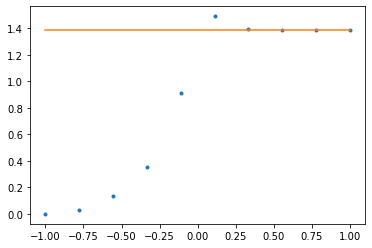

In [11]:
M = 10
N = 100
Delta = np.linspace(-1,1,M)
Entropy_array = np.array([entang_entropy_A(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

In [12]:
#Entropy_array1 = np.array([entang_entropy_A1(N, Delta[i]) for i in range(M)])
#plt.plot(Delta, Entropy_array1, ".")
#plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

# FOURIER Transform

In [45]:
def u_func(k, Delta, N):
    lambda1 = (1 - Delta) + (1 + Delta)*np.exp(-(4*np.pi/N)*1j*k)
    s = np.sqrt(lambda1 / np.conjugate(lambda1))
    u1 = (1/np.sqrt(2))*np.array([-s, 1]) 
    u2 = (1/np.sqrt(2))*np.array([s, 1])
    return u1, u2 

In [14]:
u_func(2, 0.5, 10)

(array([-0.44482983-0.54966028j,  0.70710678+0.j        ]),
 array([0.44482983+0.54966028j, 0.70710678+0.j        ]))

In [15]:
def u_func_new(k, Delta, N):
    H = np.array([[0, (1 - Delta) + (1 + Delta)*np.exp(-(4*np.pi/N)*1j*k)],[(1 - Delta) + (1 + Delta)*np.exp((4*np.pi/N)*1j*k), 0]])
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvectors

In [16]:
u_func_new(8, 0.5, 10)

array([[-0.70710678+0.j        ,  0.70710678+0.j        ],
       [-0.44482983-0.54966028j, -0.44482983-0.54966028j]])

In [17]:
def corr_matrix_new(N, Delta):
    eps = 1e-15
    C = np.zeros((N,N),dtype = "complex")
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                    C[i][j] += (1/(N//2))*np.conjugate(u_func_new(k, Delta, N)[:,0][i%2])*np.exp(-(4*np.pi/N)*1j*k*(i//2))*np.exp((4*np.pi/N)*1j*k*(j//2))*u_func_new(k, Delta, N)[:,0][j%2]
    '''for i in range(N):
        for j in range(N):
            if np.abs(np.real(C[i][j])) < eps:
                C1 = C[i][j] 
                C[i][j]= 0 + 1j*np.imag(C1)
            if np.abs(np.imag(C[i][j])) < eps:
                C2 = C[i][j]
                C[i][j]= np.real(C2)'''
    return C

In [46]:
corr_matrix_new(4, 1)

array([[ 0.5+0.000000e+00j,  0. -3.061617e-17j,  0. +3.061617e-17j,
        -0.5+6.123234e-17j],
       [ 0. +3.061617e-17j,  0.5+0.000000e+00j, -0.5+0.000000e+00j,
         0. +3.061617e-17j],
       [ 0. -3.061617e-17j, -0.5+0.000000e+00j,  0.5+0.000000e+00j,
         0. -3.061617e-17j],
       [-0.5-6.123234e-17j,  0. -3.061617e-17j,  0. +3.061617e-17j,
         0.5+0.000000e+00j]])

In [19]:
corr_matrix(4, 1)

array([[ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j],
       [ 0. +0.j,  0.5+0.j, -0.5+0.j,  0. +0.j],
       [ 0. +0.j, -0.5+0.j,  0.5+0.j,  0. +0.j],
       [-0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j]])

In [20]:
def corr_matrix_A_new(N, Delta):
    S = N//2
    return corr_matrix_new(N, Delta)[0:S, 0:S]

In [21]:
np.allclose(corr_matrix_A_new(8, 0.5), corr_matrix_A(8, 0.5), atol = 1e-8)

True

In [22]:
def entang_entropy_A_new(N, Delta):
    CM = corr_matrix_A_new(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return(S)

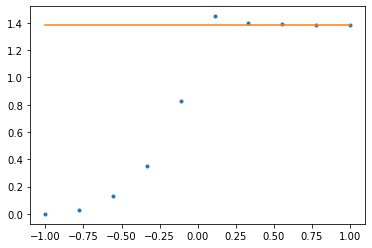

In [48]:
M = 10
N = 20
Delta = np.linspace(-1,1,M)
Entropy_array_new = np.array([entang_entropy_A_new(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array_new, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

In [ ]:
def 